## Fitness Analysis

The following questions have been answered from the dataset:

1. What is the most popular activity?
2. What are the best exercises for weight loss?
3. What is the most frequent day of exercise?
4. Which gender makes more progress over time?
5. What is the comparison of fitness levels of different genders?

The answers are in the last cell of the notebook.

In [10]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# load the dataset
data = pd.read_csv('health_fitness_dataset.csv')

### Basic Dataset Overview

In [3]:
data.head()

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33


In [55]:
print('Shape of the dataset:\n', data.shape)

Shape of the dataset:
 (687701, 24)


In [56]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   participant_id            687701 non-null  int64         
 1   date                      687701 non-null  datetime64[ns]
 2   age                       687701 non-null  int64         
 3   gender                    687701 non-null  object        
 4   height_cm                 687701 non-null  float64       
 5   weight_kg                 687701 non-null  float64       
 6   activity_type             687701 non-null  object        
 7   duration_minutes          687701 non-null  int64         
 8   intensity                 687701 non-null  object        
 9   calories_burned           687701 non-null  float64       
 10  avg_heart_rate            687701 non-null  int64         
 11  hours_sleep               687701 non-null  float64       
 12  st

In [59]:
# basic statistics of the dataset
numerical_data = data.select_dtypes(include=[np.number])
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
participant_id,687701.0,1499.781828,865.997215,1.00,749.00,1499.00,2249.00,3000.00
age,687701.0,41.658602,13.581770,18.00,30.00,42.00,53.00,64.00
height_cm,687701.0,168.587699,9.140811,145.00,161.70,168.20,175.30,198.50
weight_kg,687701.0,94.921981,22.461801,45.30,78.20,94.60,110.50,188.40
duration_minutes,687701.0,70.011671,29.147251,20.00,45.00,70.00,95.00,120.00
calories_burned,687701.0,15.381302,9.985552,0.80,7.80,13.00,20.70,92.00
avg_heart_rate,687701.0,131.454165,17.814744,82.00,118.00,130.00,144.00,206.00
hours_sleep,687701.0,7.048799,0.972068,4.00,6.40,7.00,7.70,10.00
stress_level,687701.0,5.252389,2.770029,1.00,3.00,5.00,8.00,10.00
daily_steps,687701.0,8628.370918,2054.756608,-419.00,7203.00,8607.00,10027.00,17241.00


### Handling missing values in the dataset

In [8]:
# check for missing values
print('Missing values in the dataset:\n', data.isnull().sum())

Missing values in the dataset:
 participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64


In [9]:
# check for unique values in the health_condition column
print('Unique values in health_condition column:\n', data['health_condition'].unique())

Unique values in health_condition column:
 [nan 'Diabetes' 'Hypertension' 'Asthma']


In [11]:
# fixing the null values in the health_condition column
data['health_condition'] = data['health_condition'].fillna('No Known Health Condition')

In [12]:
data.head()

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,No Known Health Condition,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,No Known Health Condition,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,No Known Health Condition,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,No Known Health Condition,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,No Known Health Condition,Never,0.33


### Analysis on the Dataset

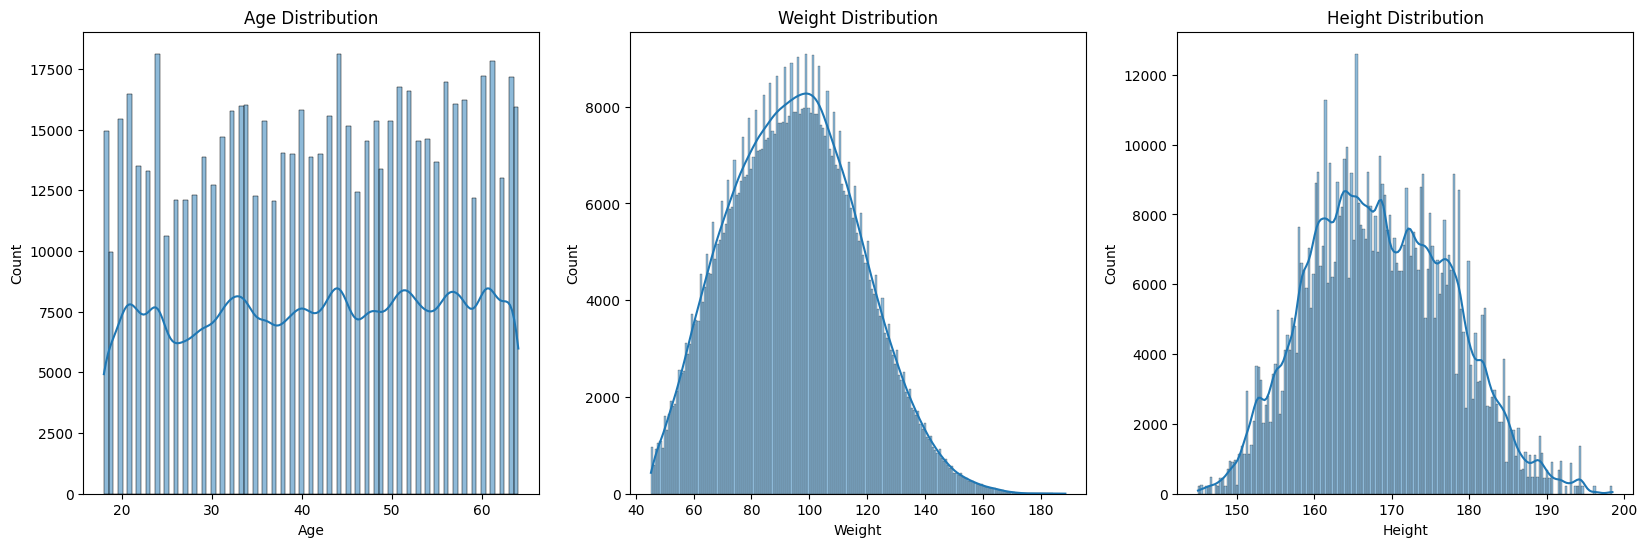

In [15]:
# age, weight and height distribution

def analyze_distribution():
    plt.figure(figsize=(20, 6))

    # age distribution
    plt.subplot(1, 3, 1)
    sns.histplot(data['age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')

    # weight distribution
    plt.subplot(1, 3, 2)
    sns.histplot(data['weight_kg'], kde=True)
    plt.title('Weight Distribution')
    plt.xlabel('Weight')
    plt.ylabel('Count')

    # height distribution
    plt.subplot(1, 3, 3)
    sns.histplot(data['height_cm'], kde=True)
    plt.title('Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Count')

    plt.show()

analyze_distribution()

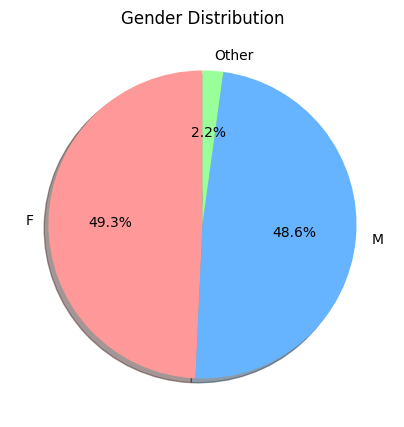

In [21]:
# pie chart for gender distribution
gender_count = data['gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff', '#99ff99'], shadow=True)
plt.title('Gender Distribution')
plt.show()

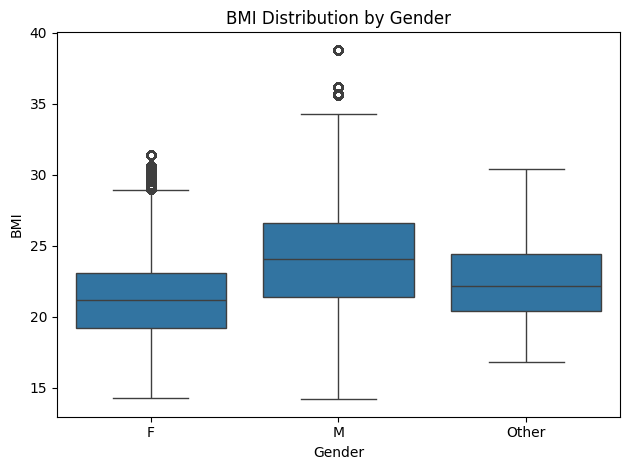

In [25]:
# boxplot for outliers in bmi
sns.boxplot(data=data, x='gender', y='bmi')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
    
plt.tight_layout()
plt.show()

C:\Users\ronit\AppData\Local\Temp\ipykernel_31024\2796120345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_count.index, y=activity_count.values, palette='viridis')


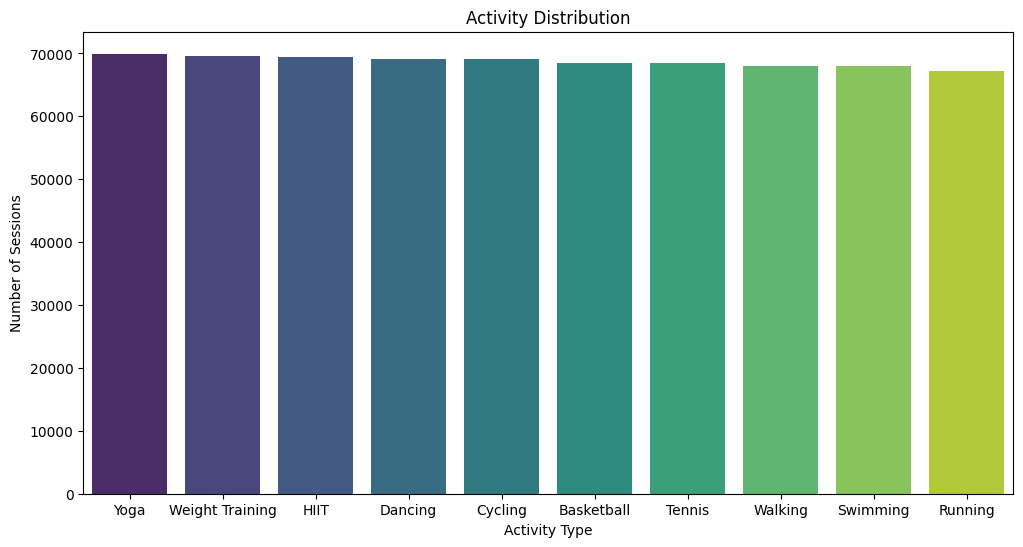

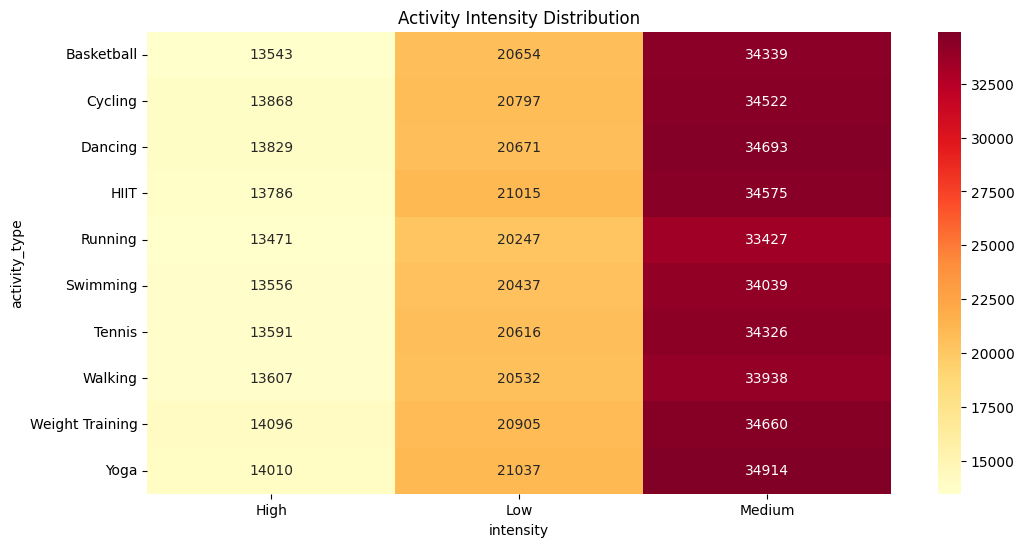

C:\Users\ronit\AppData\Local\Temp\ipykernel_31024\2796120345.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_calories.index, y=avg_calories.values, palette='rocket')


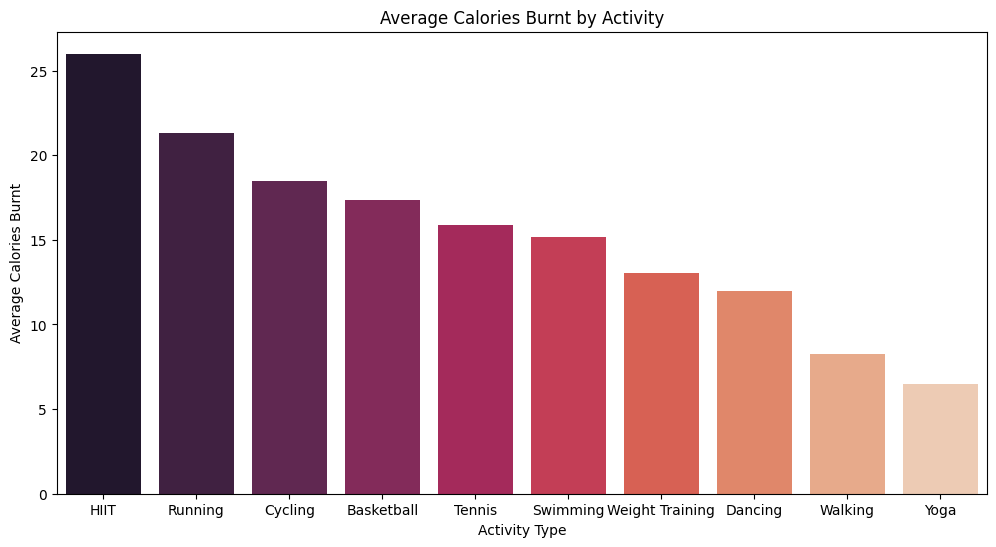

In [32]:
def activity_patterns(data):
    # Activity distribution
    plt.figure(figsize=(12, 6))
    activity_count = data['activity_type'].value_counts()
    sns.barplot(x=activity_count.index, y=activity_count.values, palette='viridis')
    plt.title('Activity Distribution')
    plt.xlabel('Activity Type')
    plt.ylabel('Number of Sessions')
    plt.show()

    # Intensity of activities
    plt.figure(figsize=(12, 6))
    activity_intensity = pd.crosstab(data['activity_type'], data['intensity'])
    sns.heatmap(activity_intensity, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Activity Intensity Distribution')
    plt.show()
    # Average calories burnt by activity
    plt.figure(figsize=(12, 6))
    avg_calories = data.groupby('activity_type')['calories_burned'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_calories.index, y=avg_calories.values, palette='rocket')
    plt.title('Average Calories Burnt by Activity')
    plt.xlabel('Activity Type')
    plt.ylabel('Average Calories Burnt')
    plt.show()

activity_patterns(data)

C:\Users\ronit\AppData\Local\Temp\ipykernel_31024\1034766858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_condition_count.index, y=health_condition_count.values, palette='viridis')


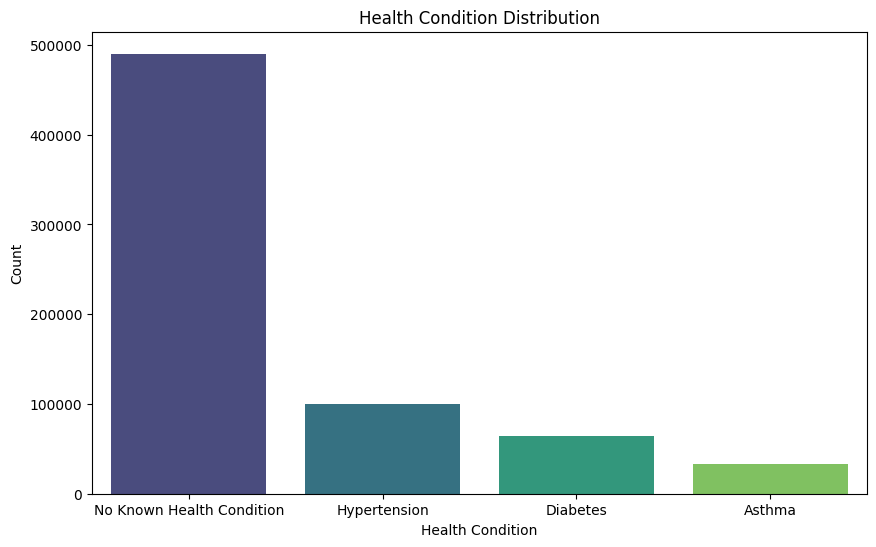

In [34]:
# health condition distribution
plt.figure(figsize=(10, 6))
health_condition_count = data['health_condition'].value_counts()
sns.barplot(x=health_condition_count.index, y=health_condition_count.values, palette='viridis')
plt.title('Health Condition Distribution')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.show()

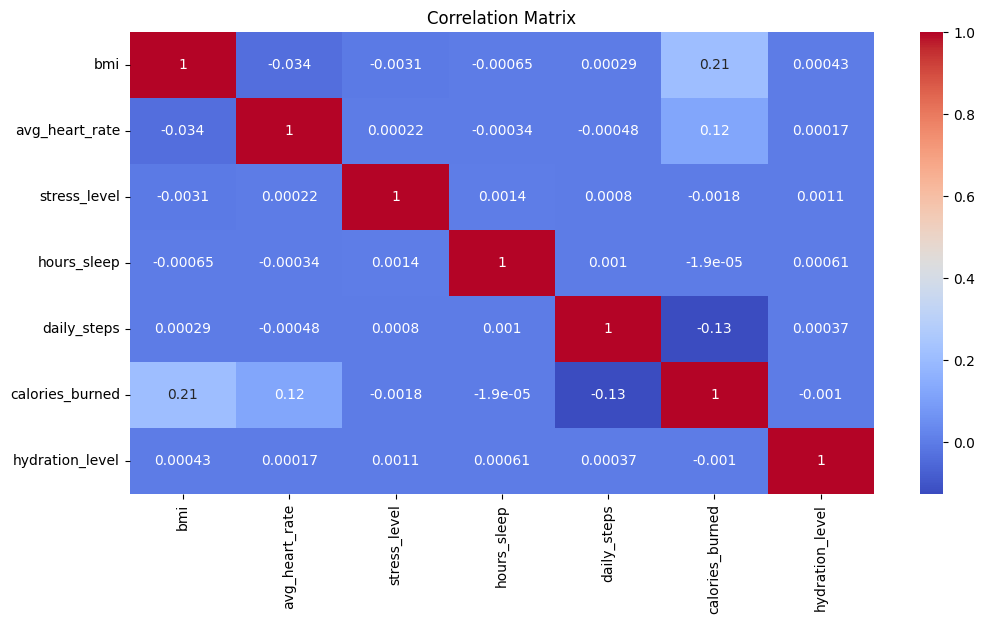

In [37]:
# correlation matrix
metrics = ['bmi', 'avg_heart_rate', 'stress_level', 'hours_sleep', 
                     'daily_steps', 'calories_burned', 'hydration_level']
plt.figure(figsize=(12, 6))
sns.heatmap(data[metrics].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<Figure size 1200x1000 with 0 Axes>

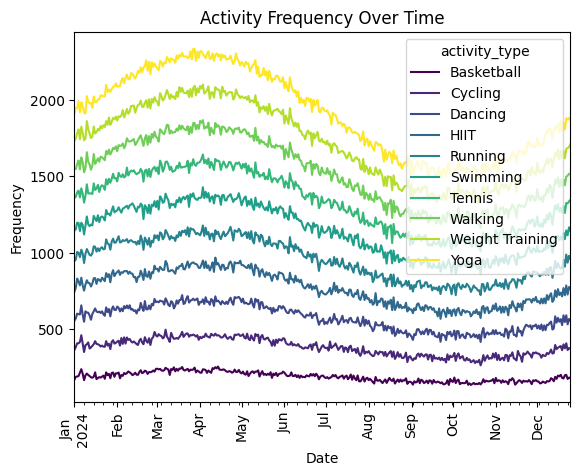

C:\Users\ronit\AppData\Local\Temp\ipykernel_31024\1818131905.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_activities.index, y=weekday_activities.values, palette='muted')


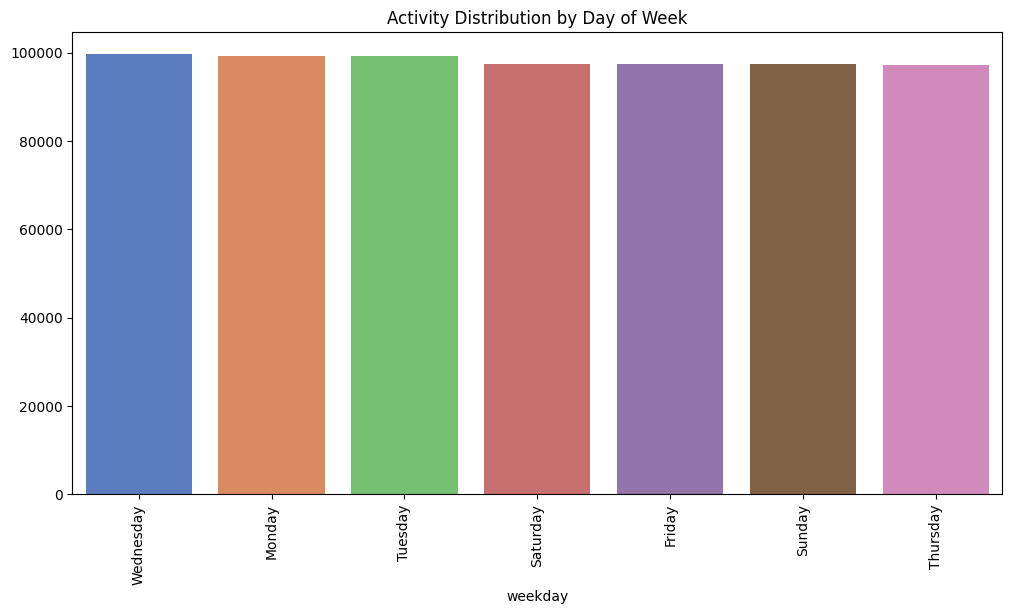

In [47]:
# activity frequency over time

def activity_frequency(data):

    daily_activities = data.groupby('date')['activity_type'].value_counts().unstack().fillna(0)

    plt.figure(figsize=(12, 10))
    daily_activities.plot(kind='line', stacked=True, cmap='viridis')
    plt.title('Activity Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()


    # activity frequency over days of the week
    # Weekly Patterns
    data['weekday'] = data['date'].dt.day_name()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    plt.figure(figsize=(12, 6))
    weekday_activities = data['weekday'].value_counts().reindex(weekday_order).sort_values(ascending=False)
    sns.barplot(x=weekday_activities.index, y=weekday_activities.values, palette='muted')
    plt.title('Activity Distribution by Day of Week')
    plt.xticks(rotation=90)
    plt.show()


activity_frequency(data)

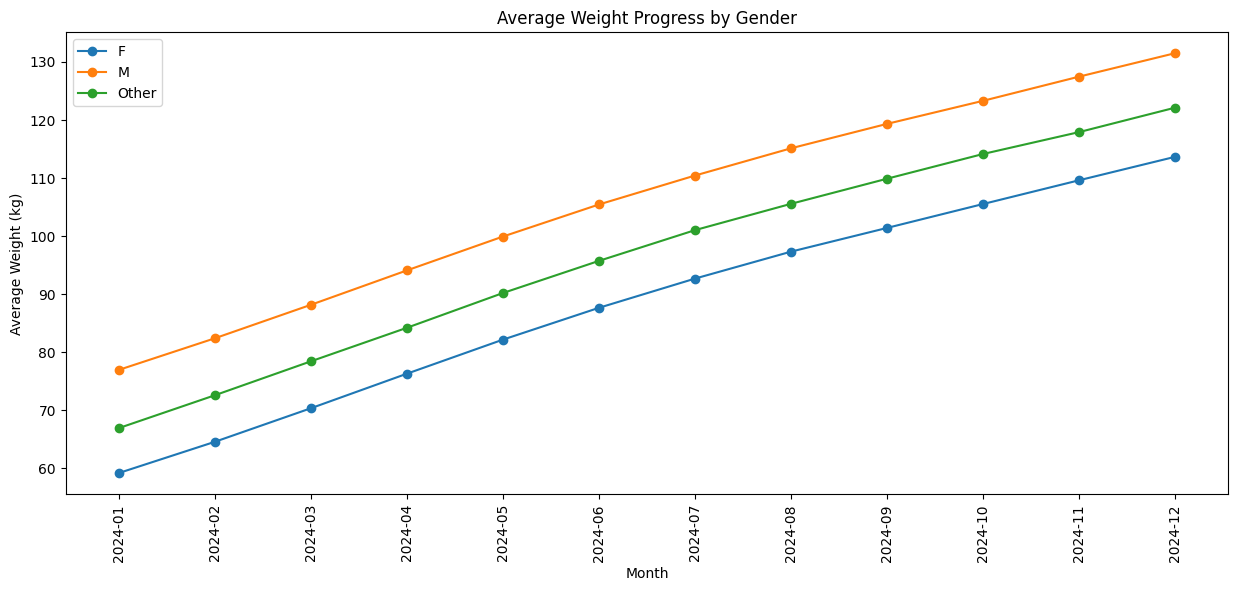

In [49]:
# average weekly progress by gender

def gender_weight_progress(data):

    # Average Weight Change Over Time
    monthly_weight = data.groupby([data['date'].dt.to_period('M'), 'gender'])['weight_kg'].mean().reset_index()
    monthly_weight['date'] = monthly_weight['date'].astype(str)
    
    plt.figure(figsize=(15, 6))
    for gender in monthly_weight['gender'].unique():
        gender_data = monthly_weight[monthly_weight['gender'] == gender]
        plt.plot(gender_data['date'], gender_data['weight_kg'], label=gender, marker='o')
    
    plt.title('Average Weight Progress by Gender')
    plt.xlabel('Month')
    plt.ylabel('Average Weight (kg)')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

gender_weight_progress(data)

C:\Users\ronit\AppData\Local\Temp\ipykernel_31024\2032347985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stress_levels.index, y=stress_levels.values, palette='muted')


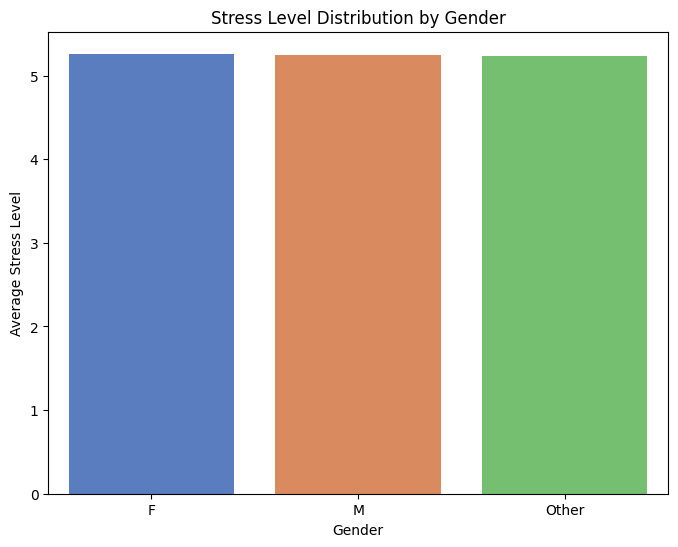

In [52]:
# gender-wise stress level distribution

stress_levels = data.groupby('gender')['stress_level'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=stress_levels.index, y=stress_levels.values, palette='muted')
plt.title('Stress Level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.show()

C:\Users\ronit\AppData\Local\Temp\ipykernel_31024\2488723288.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=steps.index, y=steps.values, palette='muted')


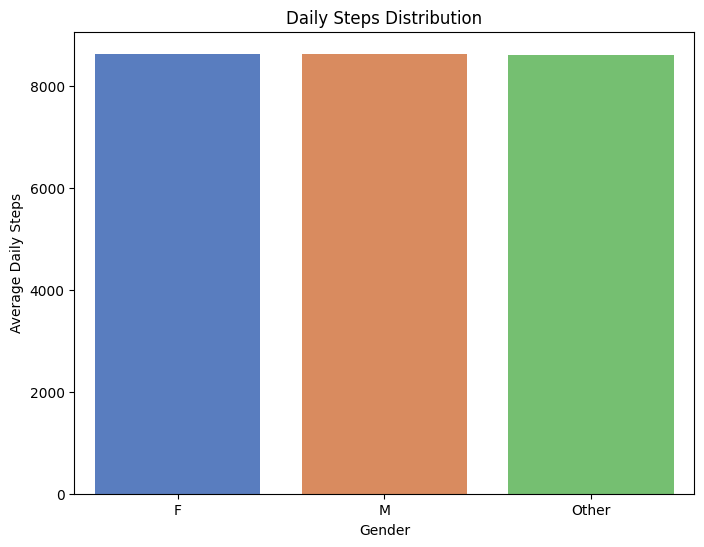

In [53]:
# gender-wise steps distribution

steps = data.groupby('gender')['daily_steps'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=steps.index, y=steps.values, palette='muted')
plt.title('Daily Steps Distribution')
plt.xlabel('Gender')
plt.ylabel('Average Daily Steps')
plt.show()

<Figure size 1000x600 with 0 Axes>

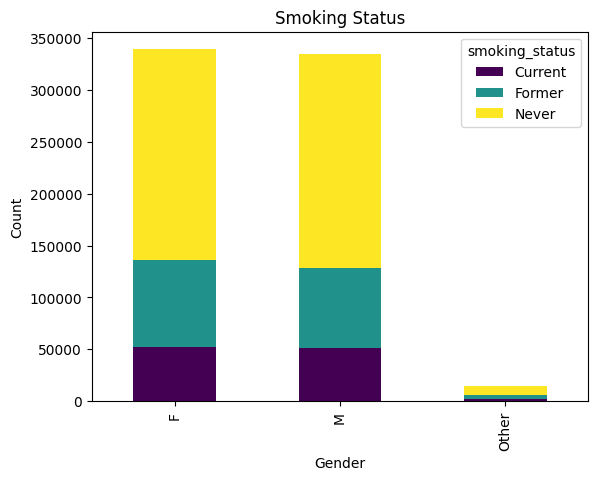

In [54]:
# gender-wise smoking status

smoking_status = data.groupby('gender')['smoking_status'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
smoking_status.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\ronit\AppData\Local\Temp\ipykernel_31024\2963972649.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fitness_levels.index, y=fitness_levels.values, palette='muted')


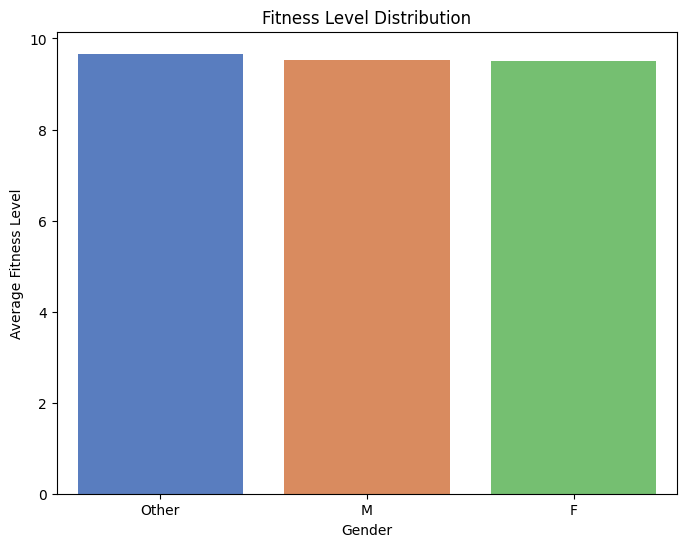

In [60]:
# fitness levels of males and females distribution

fitness_levels = data.groupby('gender')['fitness_level'].mean().sort_values(ascending=False)

# plot the fitness levels
plt.figure(figsize=(8, 6))
sns.barplot(x=fitness_levels.index, y=fitness_levels.values, palette='muted')
plt.title('Fitness Level Distribution')
plt.xlabel('Gender')
plt.ylabel('Average Fitness Level')
plt.show()

## Key Insights:

1. The most popular activity was Yoga.
2. The top three calorie-burning activities are HIIT, Running, and Cycling.
3. Most activities were performed on Wednesday.
4. Males make more progress over time than females in terms of physical activities.
5. All genders have almost the same fitness level.